# Lyrid Training - Tidy Tuesdays 2: Video Games Dataset
The purpose of this notebook is to prepare, analyze, and visualize the data from the video games dataset. This serves as my submission to Tidy Tuesdays 2, under the Lyrid Training Program.

### Python Libraries
The following are the necessary Python Libraries imported in this notebook.

In [1]:
# Data analysis and data preparation
import pandas as pd
import numpy as np
import random as rnd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preparation
In Data Preparation, the dataset is cleaned by performing processes such as removing null values and resolving formatting issues. Data Preparation is necessary so that the data may be properly analyzed and meaningful conclusions will be derived from the analysis.

In [2]:
# Read csv corresponding to the video games dataset.
df = pd.read_csv('vgsales.csv')

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# Check the different columns present in the dataset.
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [4]:
# Check the number of null values per column.
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

After inspection, it can be seen that there are two columns (Year and Publisher) that have null values. As such, rows with null values for either of these columns will be removed.

In [5]:
# Remove rows with null values
df.dropna(inplace=True)

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


It can also be seen that the values for the Year column are floating point values rather than just integers.

In [6]:
# Change datatype of Year column to integer
df = df.astype({'Year': int})

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Data Analysis
Now that the data has been cleaned, we can start analyzing our data.

In [7]:
# Group the dataset by year.
df1 = df.groupby('Year').sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]

df1.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980,10.59,0.67,0.00,0.12,11.38
1981,33.40,1.96,0.00,0.32,35.77
1982,26.92,1.65,0.00,0.31,28.86
1983,7.76,0.80,8.10,0.14,16.79
1984,33.28,2.10,14.27,0.70,50.36


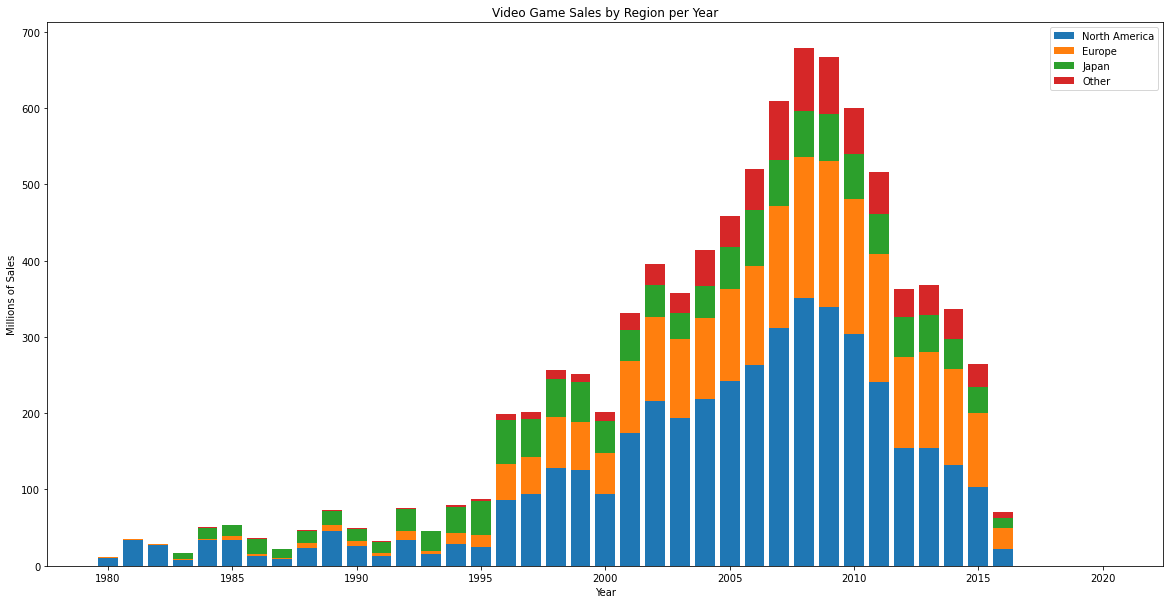

In [8]:
# Plot a stacked bar graph to show the number of video game sales by region per year.

# regions and labels
regions = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
labels = ['North America', 'Europe', 'Japan', 'Other']

# plot bars
plt.figure(figsize=(20,10))
bottom = [0] * len(df1)
for index, region in enumerate(regions):
    plt.bar(df1.index, df1[region], bottom=bottom)
    bottom += df1[region]
    
# add title, legend, and labels
plt.title('Video Game Sales by Region per Year')
plt.legend(labels)
plt.xlabel('Year')
plt.ylabel('Millions of Sales')
    
plt.show()

The bar graph shows how the sales of video games has been steadily increasing from the 1980s up to its peak in the early 2000s. Surprisingly, however, the number of video game sales is shown to be decreasing in recent years. Perhaps, the data gathered for video game sales in recent years is incomplete. In terms of the division of sales by region, North America has been consistent at being the region with the most sales. Europe was lagging behind Japan in the number of sales up until 1995. Since then, Europe has consistently more sales than Japan.

In [9]:
# Group the dataset by platform.
df2 = df.groupby('Platform').sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]

df2.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
2600,80.78,4.86,0.00,0.84,86.57
3DO,0.00,0.00,0.10,0.00,0.10
3DS,78.03,58.29,97.30,12.55,246.27
DC,5.43,1.69,8.56,0.27,15.97
DS,388.53,194.05,175.02,60.29,818.91


In [10]:
# Sort the values.
df2 = df2.sort_values('Global_Sales')

df2.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PCFX,0.0,0.0,0.03,0.0,0.03
GG,0.0,0.0,0.04,0.0,0.04
3DO,0.0,0.0,0.10,0.0,0.10
TG16,0.0,0.0,0.16,0.0,0.16
WS,0.0,0.0,1.42,0.0,1.42


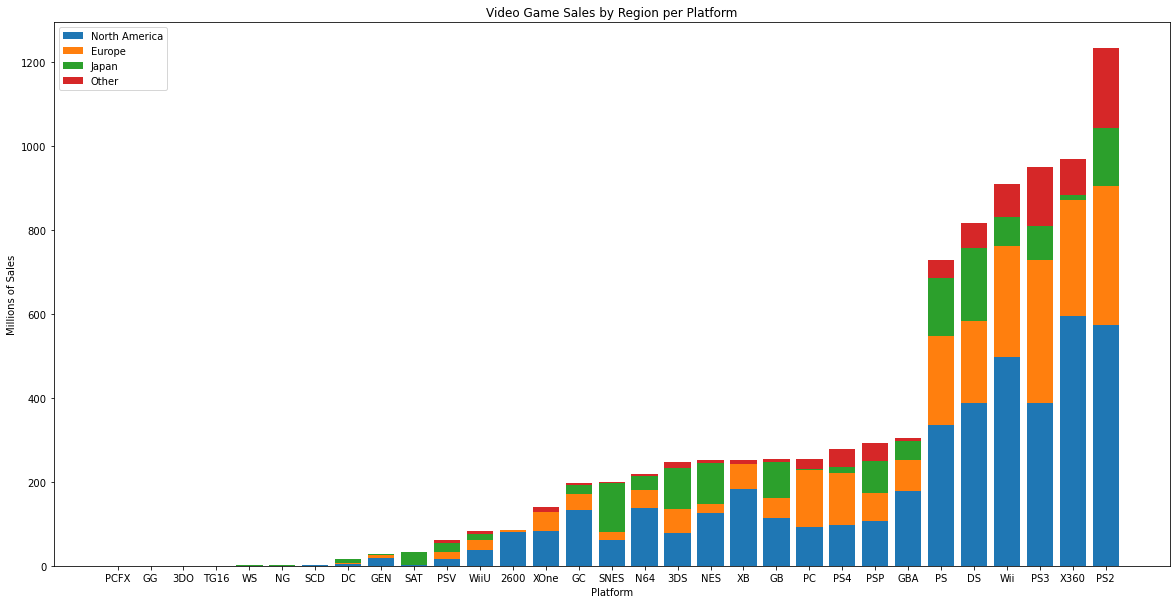

In [11]:
# Plot a stacked bar graph to show the number of video game sales by region per platform.

# regions and labels
regions = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
labels = ['North America', 'Europe', 'Japan', 'Other']

# plot bars
plt.figure(figsize=(20,10))
bottom = [0] * len(df2)
for region in regions:
    plt.bar(df2.index, df2[region], bottom=bottom)
    bottom += df2[region]
    
# add title, legend, and labels
plt.title('Video Game Sales by Region per Platform')
plt.legend(labels)
plt.xlabel('Platform')
plt.ylabel('Millions of Sales')
    
plt.show()

The bar graph shows the number of video game sales by region per platform. The top platform based on global sales is the PS2. With regards to region, the top platform is the Xbox 360 in North America, PS3 in Europe, and DS in Japan.

In [12]:
# Group the dataset by genre.
df3 = df.groupby('Genre').sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]

df3.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,861.77,516.48,158.65,184.92,1722.84
Adventure,101.93,63.74,51.99,16.70,234.59
Fighting,220.74,100.00,87.15,36.19,444.05
Misc,396.92,211.77,106.67,73.92,789.87
Platform,445.99,200.65,130.65,51.51,829.13


In [13]:
# Sort the values.
df3 = df3.sort_values('Global_Sales')

df3.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Strategy,67.83,44.84,49.10,11.23,173.27
Adventure,101.93,63.74,51.99,16.70,234.59
Puzzle,122.01,50.52,56.68,12.47,242.21
Simulation,181.78,113.02,63.54,31.36,389.98
Fighting,220.74,100.00,87.15,36.19,444.05


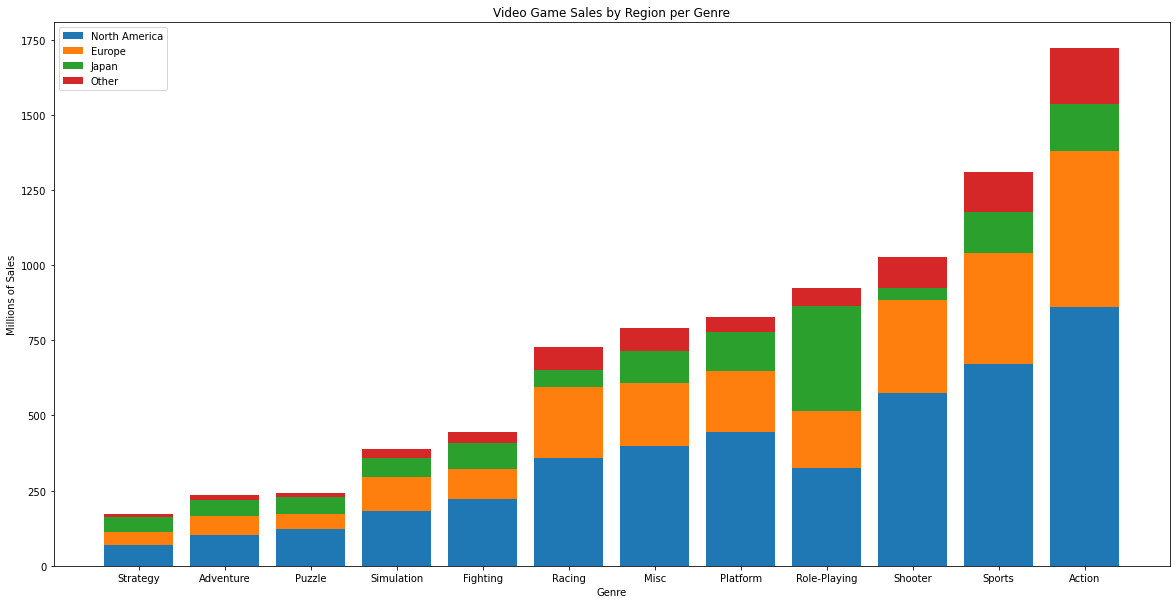

In [14]:
# Plot a stacked bar graph to show the number of video game sales by region per genre.

# regions and labels
regions = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
labels = ['North America', 'Europe', 'Japan', 'Other']

# plot bars
plt.figure(figsize=(20,10))
bottom = [0] * len(df3)
for region in regions:
    plt.bar(df3.index, df3[region], bottom=bottom)
    bottom += df3[region]
    
# add title, legend, and labels
plt.title('Video Game Sales by Region per Genre')
plt.legend(labels)
plt.xlabel('Genre')
plt.ylabel('Millions of Sales')
    
plt.show()

The bar graph shows the number of video game sales by region per genre. The top 3 genres based on global sales are Action, Sports, and Shooter. With regards to region, the top 3 genres in North America and Europe are the same as the top 3 overall. However, the top 3 in Japan is quite different with Role-Playing games taking the lead followed by Action and Sports.

### Data Visualization
After performing some exploratory data analysis, it is time to properly visualize the data using more descriptive graphs. The graphs will be helpful in coming up with meaningful conclusions.

In [15]:
# Group the dataset by year and platform.
df4 = df.groupby(['Year', 'Platform'], as_index=False).sum()
df4_overall = df4[df4['Platform']=='PS2']
df4_na = df4[df4['Platform']=='X360']
df4_eu = df4[df4['Platform']=='PS3']
df4_jp = df4[df4['Platform']=='DS']

df4.head()

,Year,Platform,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980,2600,29826,10.59,0.67,0.0,0.12,11.38
1,1981,2600,190488,33.40,1.96,0.0,0.32,35.77
2,1982,2600,149186,26.92,1.65,0.0,0.31,28.86
3,1983,2600,49355,5.44,0.34,0.0,0.06,5.83
4,1983,NES,7404,2.32,0.46,8.1,0.08,10.96


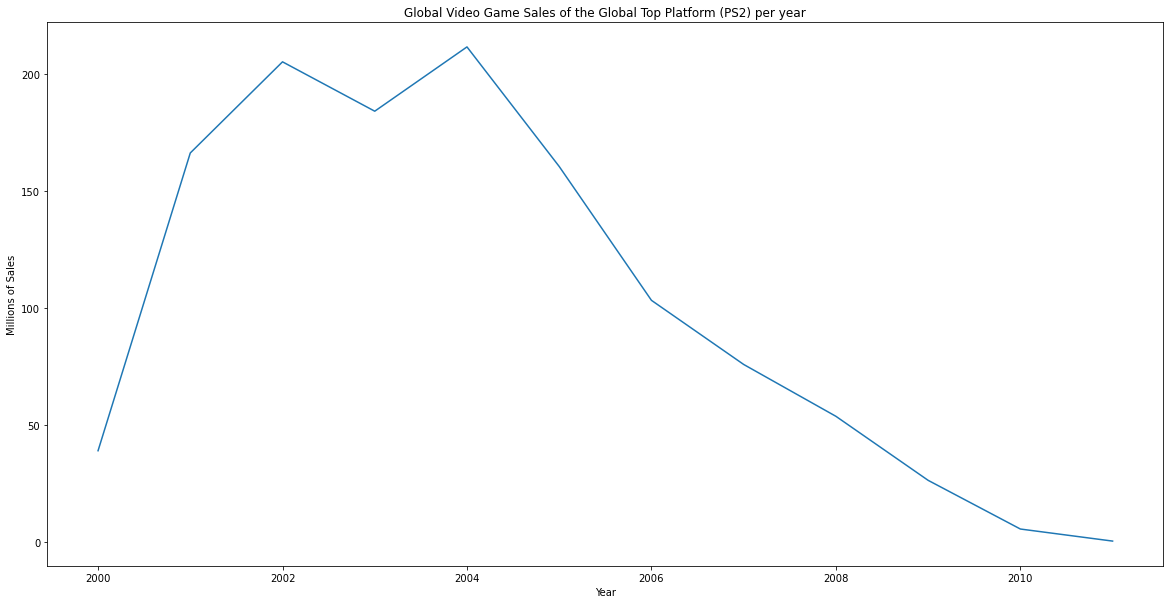

In [16]:
# Plot the number of global video game sales of the overall top platform per year.
plt.figure(figsize=(20,10))
plt.plot(df4_overall['Year'], df4_overall['Global_Sales'])
plt.title('Global Video Game Sales of the Global Top Platform (PS2) per year')
plt.xlabel('Year')
plt.ylabel('Millions of Sales')
plt.show()

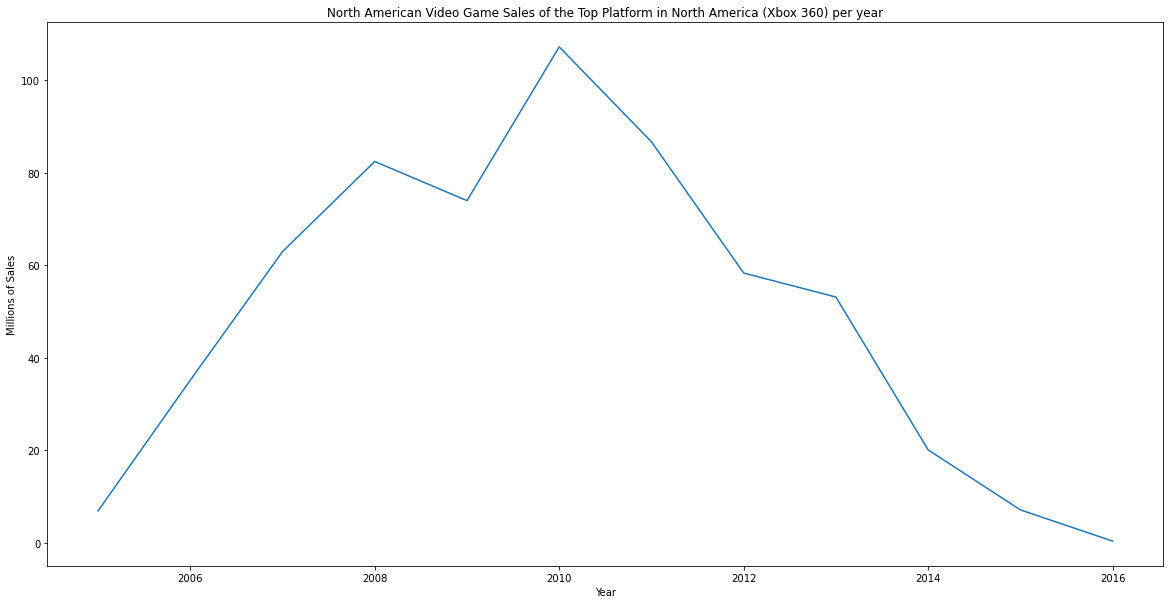

In [17]:
# Plot the number of North American video game sales of the top platform in North America per year.
plt.figure(figsize=(20,10))
plt.plot(df4_na['Year'], df4_na['NA_Sales'])
plt.title('North American Video Game Sales of the Top Platform in North America (Xbox 360) per year')
plt.xlabel('Year')
plt.ylabel('Millions of Sales')
plt.show()

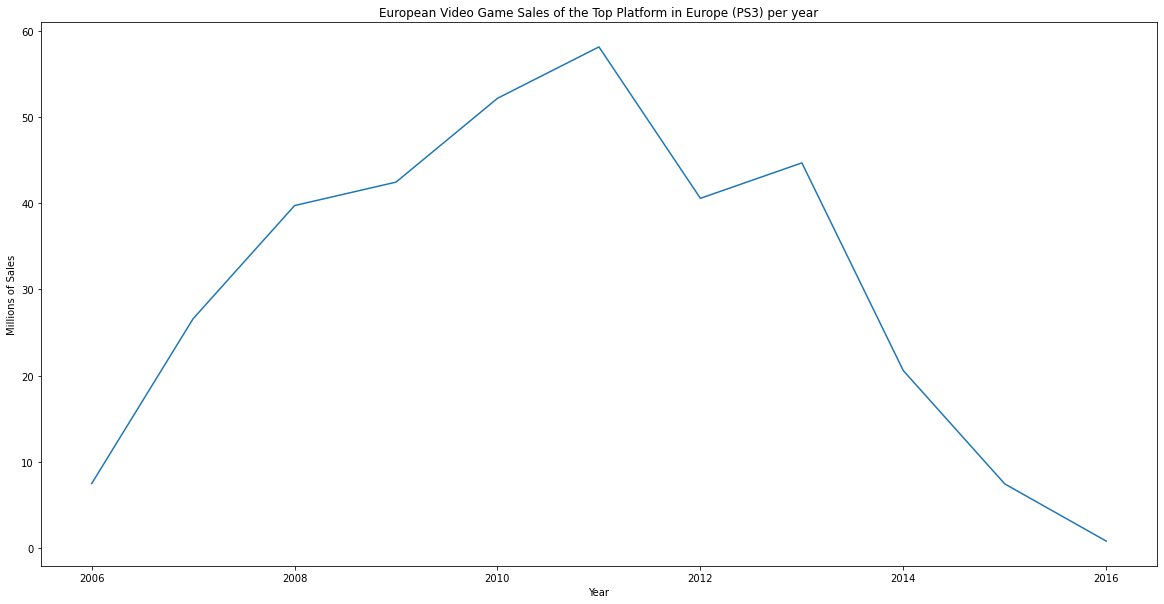

In [18]:
# Plot the number of European video game sales of the top platform in Europe per year.
plt.figure(figsize=(20,10))
plt.plot(df4_eu['Year'], df4_eu['EU_Sales'])
plt.title('European Video Game Sales of the Top Platform in Europe (PS3) per year')
plt.xlabel('Year')
plt.ylabel('Millions of Sales')
plt.show()

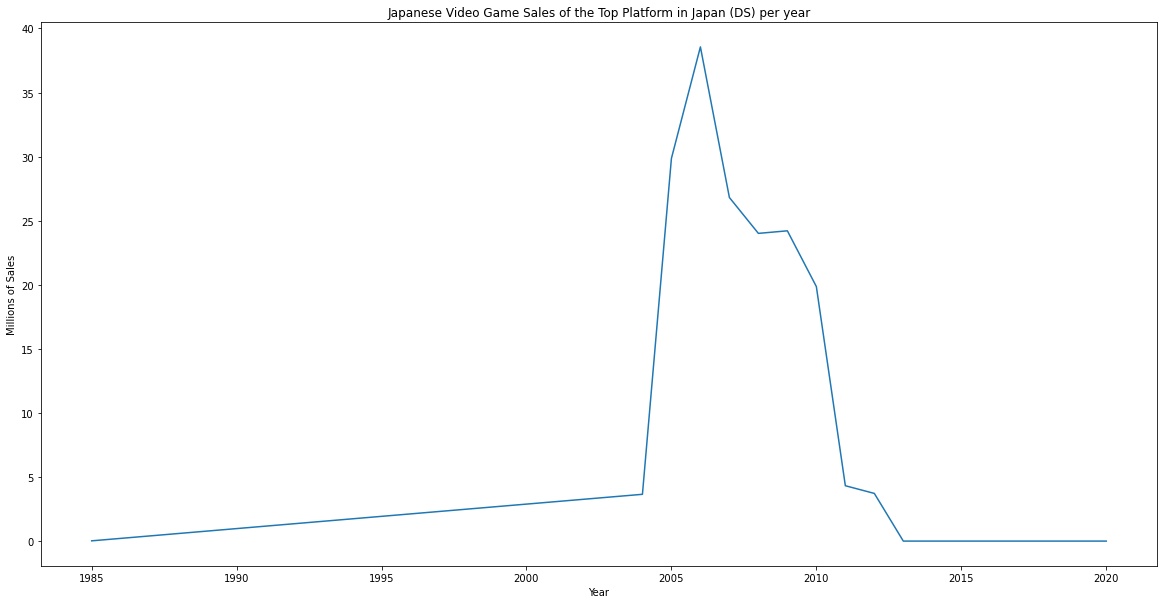

In [19]:
# Plot the number of Japanese video game sales of the top platform in Japan per year.
plt.figure(figsize=(20,10))
plt.plot(df4_jp['Year'], df4_jp['JP_Sales'])
plt.title('Japanese Video Game Sales of the Top Platform in Japan (DS) per year')
plt.xlabel('Year')
plt.ylabel('Millions of Sales')
plt.show()

In [20]:
# Group the dataset by year and genre.
df5 = df.groupby(['Year', 'Genre'], as_index=False).sum()
df5_1 = df5[df5['Genre']=='Action']
df5_2 = df5[df5['Genre']=='Sports']
df5_3 = df5[df5['Genre']=='Shooter']
df5_jp = df5[df5['Genre']=='Role-Playing']

df5.head()

,Year,Genre,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980,Action,5368,0.32,0.02,0.0,0.00,0.34
1,1980,Fighting,2671,0.72,0.04,0.0,0.01,0.77
2,1980,Misc,16956,2.53,0.15,0.0,0.02,2.71
3,1980,Shooter,804,6.56,0.43,0.0,0.08,7.07
4,1980,Sports,4027,0.46,0.03,0.0,0.01,0.49


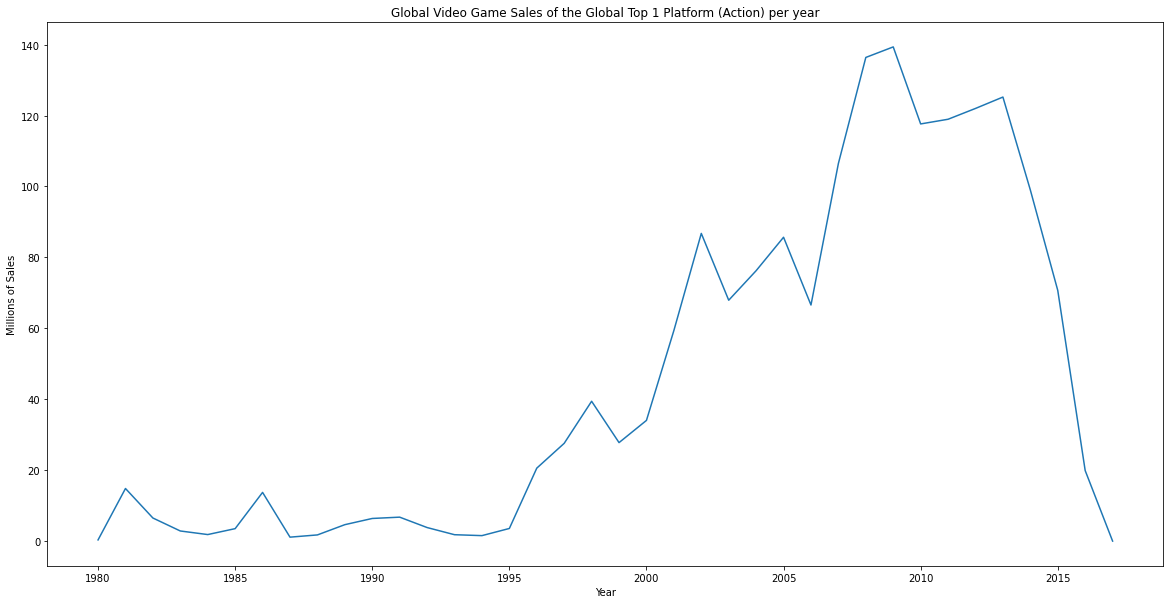

In [21]:
# Plot the number of Global video game sales of the overall top 1 genre per year.
plt.figure(figsize=(20,10))
plt.plot(df5_1['Year'], df5_1['Global_Sales'])
plt.title('Global Video Game Sales of the Global Top 1 Genre (Action) per year')
plt.xlabel('Year')
plt.ylabel('Millions of Sales')
plt.show()

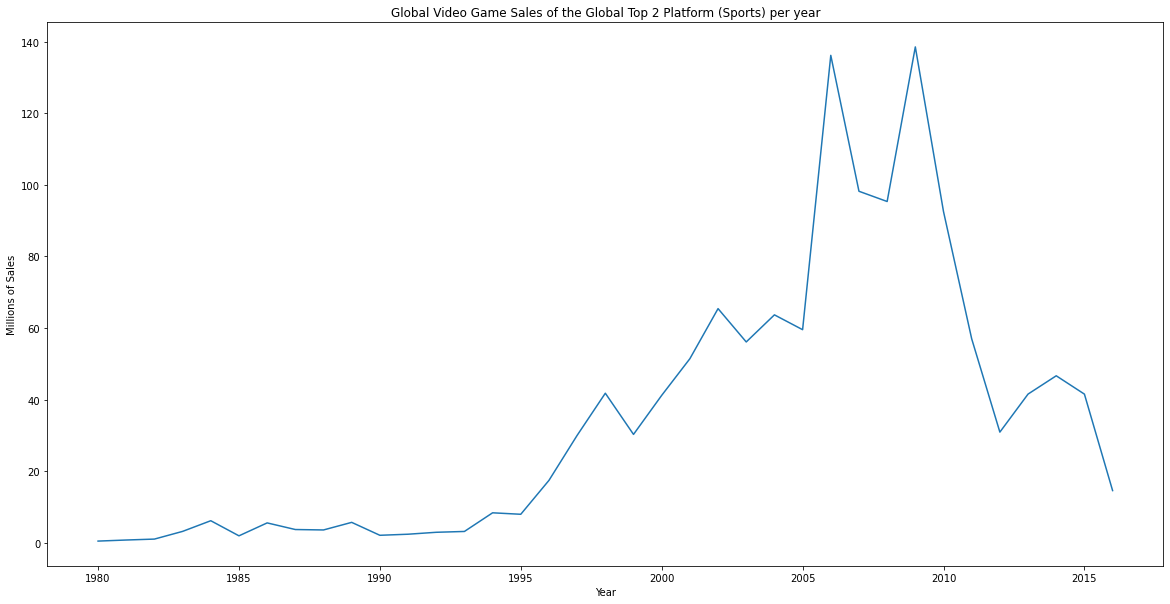

In [22]:
# Plot the number of Global video game sales of the overall top 2 genre per year.
plt.figure(figsize=(20,10))
plt.plot(df5_2['Year'], df5_2['Global_Sales'])
plt.title('Global Video Game Sales of the Global Top 2 Genre (Sports) per year')
plt.xlabel('Year')
plt.ylabel('Millions of Sales')
plt.show()

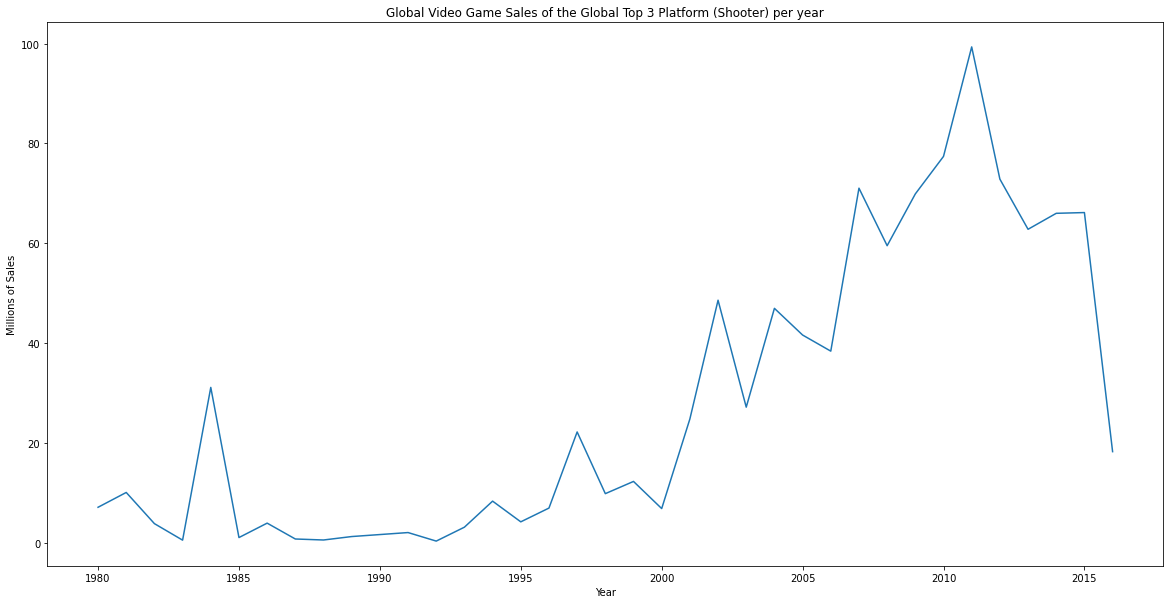

In [23]:
# Plot the number of Global video game sales of the overall top 3 genre per year.
plt.figure(figsize=(20,10))
plt.plot(df5_3['Year'], df5_3['Global_Sales'])
plt.title('Global Video Game Sales of the Global Top 3 Genre (Shooter) per year')
plt.xlabel('Year')
plt.ylabel('Millions of Sales')
plt.show()

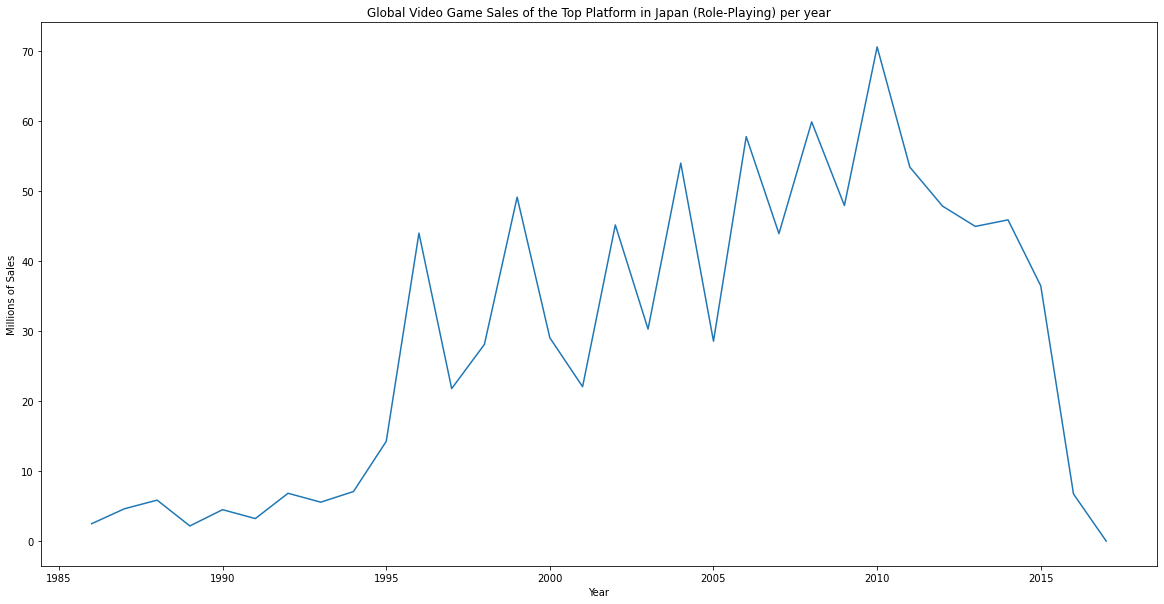

In [25]:
# Plot the number of Japanese video game sales of the top genre in Japan per year.
plt.figure(figsize=(20,10))
plt.plot(df5_jp['Year'], df5_jp['Global_Sales'])
plt.title('Global Video Game Sales of the Top Platform in Japan (Role-Playing) per year')
plt.xlabel('Year')
plt.ylabel('Millions of Sales')
plt.show()